In [1]:
import os
os.chdir(path='../../')
import scanpy as sc
import plotly.express as px
import matplotlib.pyplot as plt
import STForte.helper as stfhelper
from STForte.helper import mclust_R
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import normalized_mutual_info_score as NMI
sc.set_figure_params(dpi=120, transparent=True, dpi_save=400, frameon=False, vector_friendly=False, format="pdf")
trial_name = "trial-DLPFC-pca/151673"
plot_dir = f"./{trial_name}/plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
sc.settings.figdir = plot_dir
plt.rcParams['font.sans-serif'] = [
    'Helvetica',
    'Arial',
    'sans-serif',]
palette = px.colors.qualitative.Plotly

Global seed set to 0


In [2]:
adata = sc.read_h5ad(f"./{trial_name}/outputs/stforte.h5ad")
adata

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'spatialLIBD', 'STForte_Mask'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialLIBD_colors'
    obsm: 'STForte_ATTR', 'STForte_COMB', 'STForte_TOPO', 'spatial'

In [3]:
n_clusters = 7
adata = mclust_R(adata, n_clusters, "mclust_STForte_COMB", used_obsm="STForte_COMB")

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



In [4]:
sc.pp.neighbors(adata, use_rep="STForte_COMB")
sc.tl.umap(adata)

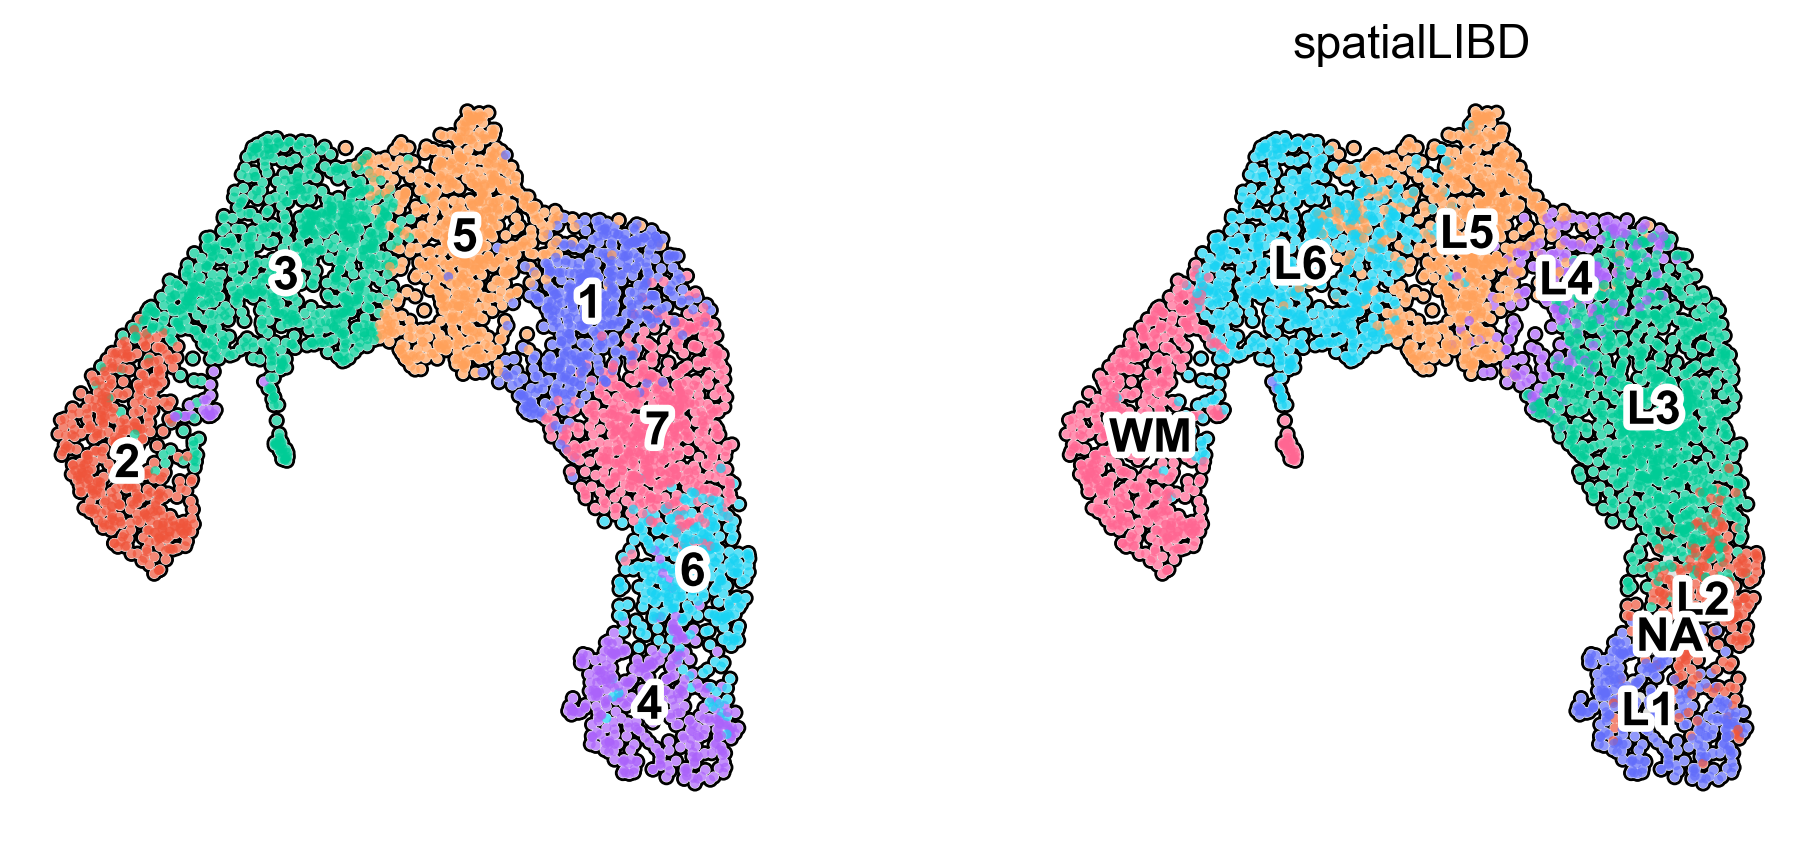

In [5]:
sc.pl.umap(adata, color=["mclust_STForte_COMB","spatialLIBD"], title="",
           legend_loc="on data", legend_fontoutline=4, add_outline=True, palette=palette, frameon=False,)

[<AxesSubplot:title={'center':'spatialLIBD'}, xlabel='spatial1', ylabel='spatial2'>,
 <AxesSubplot:title={'center':'mclust_STForte_COMB'}, xlabel='spatial1', ylabel='spatial2'>]

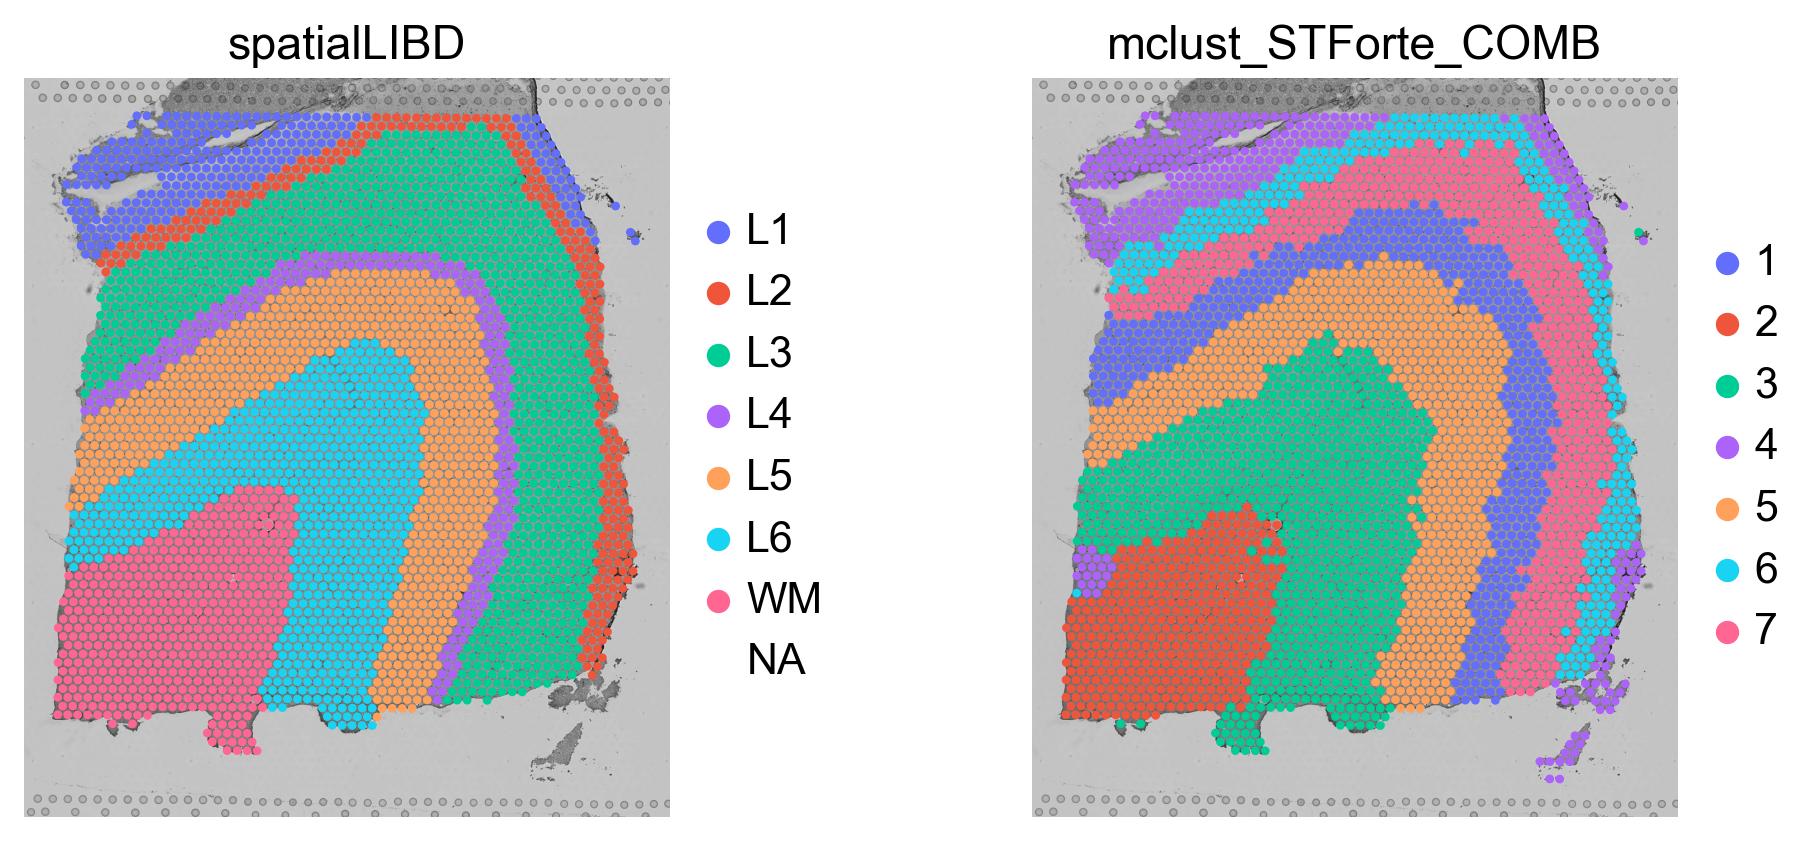

In [6]:
sc.pl.spatial(adata, color=["spatialLIBD","mclust_STForte_COMB"], img_key="hires", bw=True, title=['spatialLIBD'], size=1.25, frameon=False,
                  legend_fontoutline=4, show=False,)

In [7]:
print("ARI_COMB:",ARI(adata.obs['mclust_STForte_COMB'].to_numpy(), adata.obs['spatialLIBD'].astype(str)))
print("NMI_COMB:",NMI(adata.obs['mclust_STForte_COMB'].to_numpy(), adata.obs['spatialLIBD'].astype(str)))

ARI_COMB: 0.6072958762255776
NMI_COMB: 0.7086673922504615


In [8]:
adata.write_h5ad(f"./{trial_name}/outputs/stforte.h5ad")